# Light curve minima fitter and O-C calculator

As shape of the minimum of pulsating stars varies by time, each minimum is fitted by a function individually in a given phase interval.

Errors are estimate with brute force, i.e. resampling observations n times with known observational errors.

OC fitter
To calculate the O-C diagram of a variable star, each minima can be fitted with a given function and associated OC errors are estimated in different ways.

Three kind of functions are available to fit each minimum. Polynomial, non-parametric and model (obtained from fitting the median of phase curve). Errors are from resampling the light curves using their brightness measurement errors.

In [1]:
from seismolab.OC import OCFitter

import numpy as np
import matplotlib.pyplot as plt

# Important notes, checklist:

- Check `filename` and `suffix` to load desired files
- Use magnitude-like scale __to fit true maxima__, use flux-like scale __to fit true minima__
- If period is not known, use `get_VSX` to query VSX
- If times are in JD, use `JD2BJD` to convert to BJD
- Check `sigma_clipping`'s `sigma` at first run to not to exclude useful points
 - __~4__ is OK if light curve is noisy (TESS) 
 - __~10__ is OK if light curve is very clean (Kepler/K2)
- Select function type (`fittype`) to be fitted
 - It can be `poly` , `nonparametric` or `model`
 - `poly` fits given order polynomial to each minimum individually
   - Requires the `order` to be set
 - `nonparametric` fits a smooth function to each minimum individually
   - Very sensitive to outliers!
   - Requires `smoothness` to be set.
 - `model` fits a smooth function to the median of phase folded light curve
   - The resulted function is shifted to each minimum
   - Error estimation is very slow, set `samplings` to ~100.
- Check minimum fit result at first run
 - Check `order` of polynomial to be fitted to each minimum (if `fittype` is `poly`)
 - Check `smoothness` of function to be fitted to each minimum (if `fittype` is `nonparametric`)
   - __~1:__ to follow small scale variations, __>1 (e.g. 1.5):__ to fit really smooth function
 - `phase_interval` is the phase interval, which is selected around an expected minimum to fit the selected function

# Example stars (generated from real K2 observations):
- 1. variable star with stable pulsation (flat O-C)
- 2. variable star with periodic O-C variation: A=0.02 days, P=100 days

#### Input data informations

#### Loop over all stars

Check commented parts to see if they are needed

In [2]:
lc = np.loadtxt("https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:HLSP/qlp/s0001/0000/0000/4041/2372/hlsp_qlp_tess_ffi_s0001-0000000040412372_tess_v01_llc.txt", delimiter=',').T

# Store results in separate arrays for clarity
time       = lc[0]
flux = -np.log10(lc[1])+25
fluxerr = np.ones_like(time)*0.01

period = 0.409837

Calculating minima times...


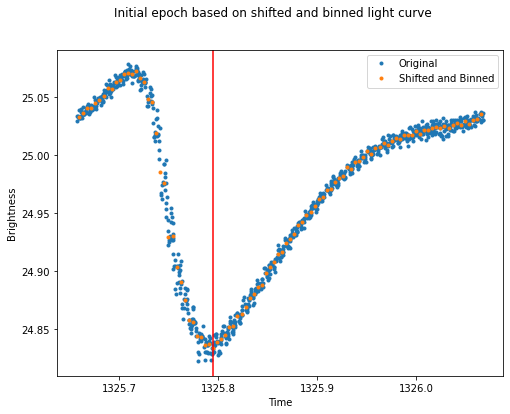

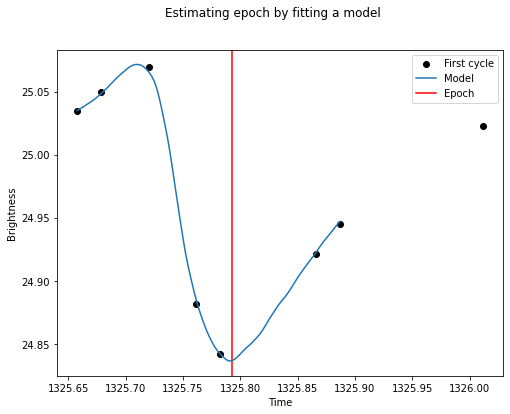

Fitting cycles:   0%|                                        | 0/57 [00:00<?, ?it/s]

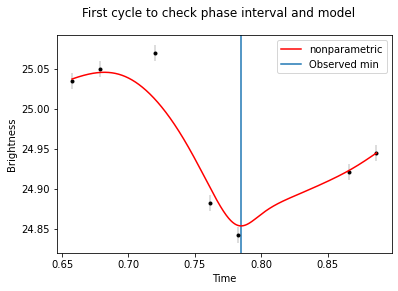

Fitting cycles:  95%|█████████████████████████████▎ | 54/57 [00:12<00:00,  4.38it/s]

Done!


In [3]:
# Initialize fitter
fitter = OCFitter(time,flux,fluxerr, period)

# Calculate minimum times
mintimes,mintimes_err = fitter.fit_minima(fittype='nonparametric', phase_interval=0.4,
                                          order=7, smoothness=1.0,
                                          npools=-1, samplings=10,
                                          showfirst=True, saveplot=False, showplot=False,
                                          filename='name',
                                         debug=False)

Calculating O-C...


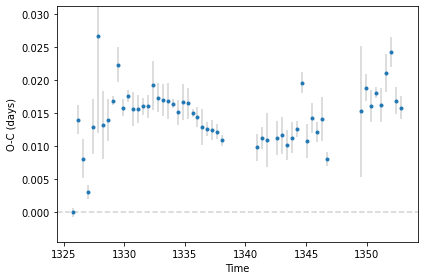

In [4]:
# Calculate O-C
midtimes,OC,OC_err = fitter.calculate_OC(mintimes,period,min_times_err=mintimes_err,
                                saveplot=False,showplot=True,
                                saveOC=False,filename='name')

Calculating minima times...


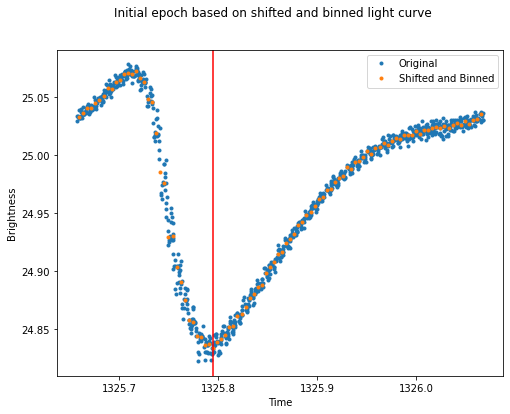

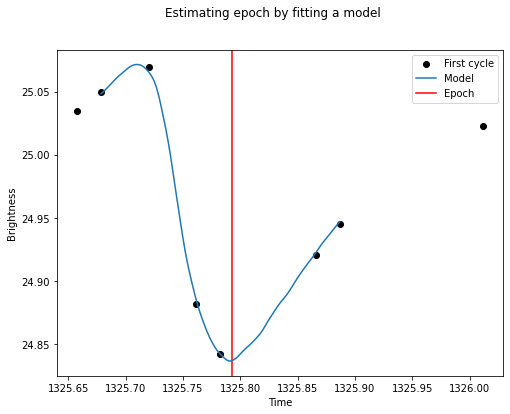

Fitting cycles:   0%|                                        | 0/57 [00:00<?, ?it/s]

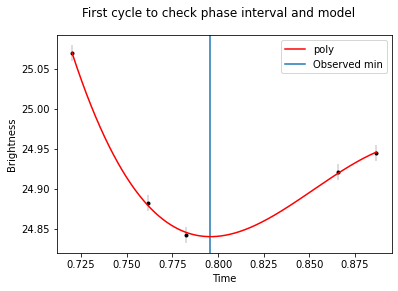

Fitting cycles:  95%|█████████████████████████████▎ | 54/57 [00:01<00:00, 28.64it/s]

Done!


In [5]:
# Initialize fitter
fitter = OCFitter(time,flux,fluxerr, period)

# Calculate minimum times
mintimes,mintimes_err = fitter.fit_minima(fittype='poly', phase_interval=0.3,
                                          order=3, smoothness=1.0,
                                          npools=-1, samplings=10,
                                          showfirst=True, saveplot=False, showplot=False,
                                          filename='name',
                                         debug=False)

Calculating O-C...


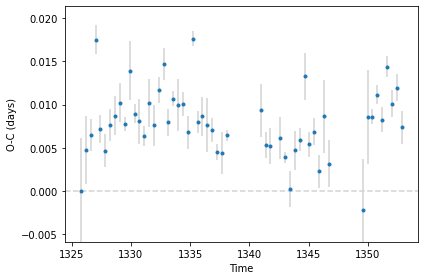

In [6]:
# Calculate O-C
midtimes,OC,OC_err = fitter.calculate_OC(mintimes,period,min_times_err=mintimes_err,
                                saveplot=False,showplot=True,
                                saveOC=False,filename='name')

Calculating minima times...


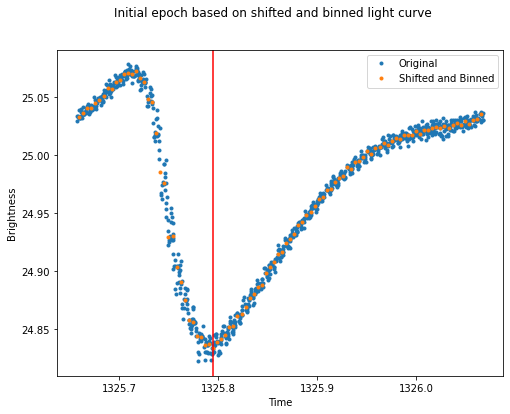

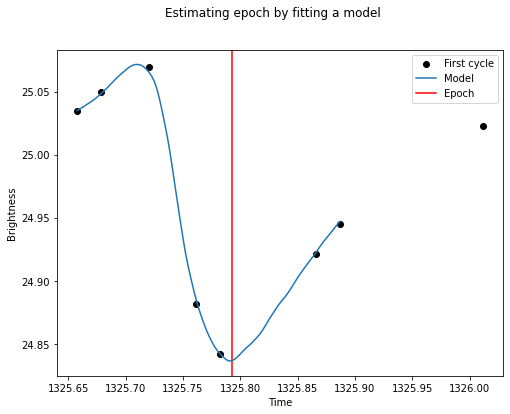

Fitting cycles:   0%|                                        | 0/57 [00:00<?, ?it/s]

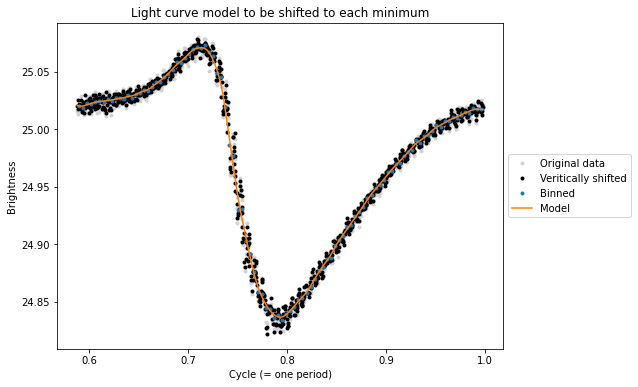

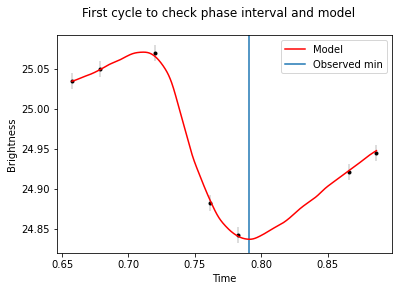

Fitting cycles:  96%|█████████████████████████████▉ | 55/57 [00:35<00:01,  1.54it/s]

Done!


In [7]:
# Initialize fitter
fitter = OCFitter(time,flux,fluxerr, period)

# Calculate minimum times
mintimes,mintimes_err = fitter.fit_minima(fittype='model', phase_interval=0.4,
                                          order=7, smoothness=1.0,
                                          npools=-1, samplings=10,
                                          showfirst=True, saveplot=False, showplot=False,
                                          filename='name',
                                         debug=False)

Calculating O-C...


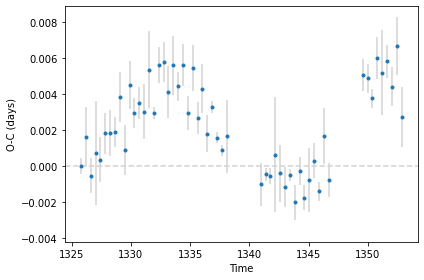

In [8]:
# Calculate O-C
midtimes,OC,OC_err = fitter.calculate_OC(mintimes,period,min_times_err=mintimes_err,
                                saveplot=False,showplot=True,
                                saveOC=False,filename='name')